In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pylab
from networkx.algorithms import community
import pygraphviz
import graphviz

G = nx.Graph()
data=data = pd.read_csv("incidents_datasets.csv")
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]

In [27]:
# data_cat.groupby(['categoryname']).count()

In [28]:
# data_cat=data[cat_cols].apply(lambda x: pd.factorize(cat_cols)[0])

In [29]:
# data.update(data_cat)

In [30]:
# data.dtypes
# data = data.convert_objects(convert_numeric=True)
# data[cat_cols] = data[cat_cols].apply(lambda x: pd.to_numeric(x), axis=0)

In [31]:
# data = pd.read_csv("incidents_datasets_KE.csv")

In [32]:
# data=data.iloc[:100, : 100]

In [33]:
# data=data.T
# data.head(10)


In [34]:
# data['domain']='domain'

In [35]:
# data.loc[['alert_ids','categoryname','client_code'],['domain']]='client_domain'
# data.loc[['ip','ipcategory_name','ipcategory_scope','grandparent_category','weekday','dstipcategory_dominate','srcipcategory_dominate'],['domain']]='ip_domain'
# data.loc[['thrcnt_week','thrcnt_month','thrcnt_day','parent_category','timestamp_dist','start_hour','start_minute','start_second'],['domain']]='time_domain'
# data.loc[['overallseverity','enforcementscore','untrustscore','flowscore'],['domain']]='severity'
# data.loc[['severity_cd','alerttype_cd','isiptrusted'],['domain']]='score'
# data.loc[['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10'],['domain']]='n_domain'
# data.loc[['p5m','p5w','p5d','p8m','p8w','p8d'],['domain']]='p_domain'

In [36]:
# G = nx.Graph()
# labels=G.add_edges_from(
#     [('categories', 'ipcategory_scope'), ('categories', 'ip'), ('categories', 'ipcategory_name'), ('ip', 'alerts'), ('ipcategory_name', 'path'),
#      ('ipcategory_name', 'grandparent_category'), ('path', 'dstipcategory'), ('path', 'srcipcategory'), ('alerts', 'overallseverity'),('alerts', 'clientcode'),('alerts', 'alerts_id')],weight=1)

# val_map = {'ipcategory_scope': 1.0,
#            'categories': 0.80543,
#            'ip': 0.414285714285714,
#            'path': 0.614285714285714,
#            'ipcategory_name': 0.414285714285714,
#            'alerts': 0.10}

# pos = nx.spring_layout(G)
# edge_labels=dict([((u,v,),d['weight'])
#                  for u,v,d in G.edges(data=True)])
# values = [val_map.get(node, 0.75) for node in G.nodes()]
# print("radius: %d" % nx.radius(G))
# print("diameter: %d" % nx.diameter(G))
# print("eccentricity: %s" % nx.eccentricity(G))
# print("center: %s" % nx.center(G))
# print("periphery: %s" % nx.periphery(G))
# print("density: %s" % nx.density(G))
# # nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
# nx.draw(G,pos, with_labels=True,cmap = plt.get_cmap('jet'),node_size=2000,font_size=10,node_color =values,alpha=0.80)
# plt.axis('off')
# pylab.show()



In [37]:
# G = nx.Graph()
# nx.average_degree_connectivity(G) # For a node of degree k - What is the average of its neighbours' degree?

In [38]:
# communities_generator = community.girvan_newman(G)
# top_level_communities = next(communities_generator)
# next_level_communities = next(communities_generator)
# sorted(map(sorted, next_level_communities))

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


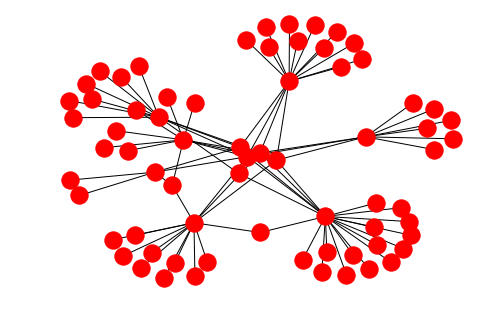

In [39]:
g = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='weekday') 
g=nx.draw(g)

In [43]:
ips = list(data_cat[0:100].ip.unique())
alerts = list(data_cat[0:100].alert_ids.unique())
weekdays=list(data_cat[0:100].weekday.unique())
ip_cat_name= list(data_cat[0:100].ipcategory_name.unique())
notify_cat=list(data_cat[0:100].notified.unique())

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


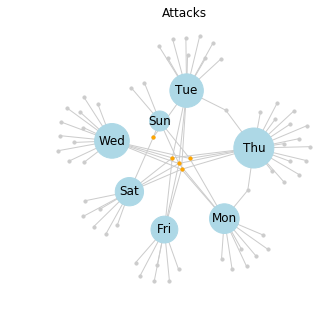

In [45]:
plt.figure(figsize=(5, 5))

g = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='weekday') 
layout = nx.spring_layout(g,seed=100)
week_size = [g.degree(weekday) * 80 for weekday in weekdays]
nx.draw_networkx_nodes(g,
                       layout, 
                       with_labels=True, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g, layout, nodelist=ips, node_color='#cccccc', node_size=10)
popular_ips = [ip for ip in ips if g.degree(ip) > 2]
nx.draw_networkx_nodes(g, layout , nodelist=popular_ips, node_color='orange', node_size=10)
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


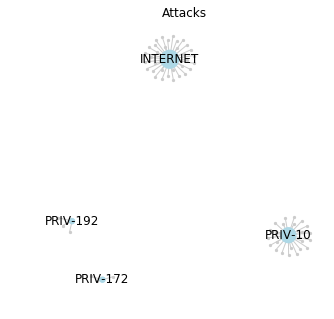

In [47]:
plt.figure(figsize=(5, 5))

g1 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='ipcategory_name') 

layout = nx.spring_layout(g1)
ip_size = [g1.degree(name) * 10 for name in ip_cat_name]
nx.draw_networkx_nodes(g1,
                       layout, 
                       with_labels=True, 
                       nodelist=ip_cat_name, 
                       node_size=ip_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g1, layout, nodelist=ips, node_color='#cccccc', node_size=5)
popular_ips = [ip for ip in ips if g1.degree(ip) > 2]
nx.draw_networkx_nodes(g1, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g1, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(g1, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

In [50]:
import matplotlib.pyplot as plt
import pylab
import graphviz

plt.figure(figsize=(15, 15))

g2 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='notified') 

layout = nx.spring_layout(g2)
notify_size = [g2.degree(notify) * 10 for notify in notify_cat]
nx.draw_networkx_nodes(g2,
                       layout, 
                       with_labels=True, 
                       nodelist=notify_cat, 
                       node_size=notify_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')

nx.draw_networkx_nodes(g2, layout, nodelist=ips, node_color='#cccccc', node_size=5)
popular_ips = [ip for ip in ips if g2.degree(ip) > 2]
nx.draw_networkx_nodes(g2, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g2, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(g2, layout, labels=node_labels)
plt.axis('off')
plt.title("Attacks")
plt.show()

KeyError: 'notified'

<Figure size 1080x1080 with 0 Axes>

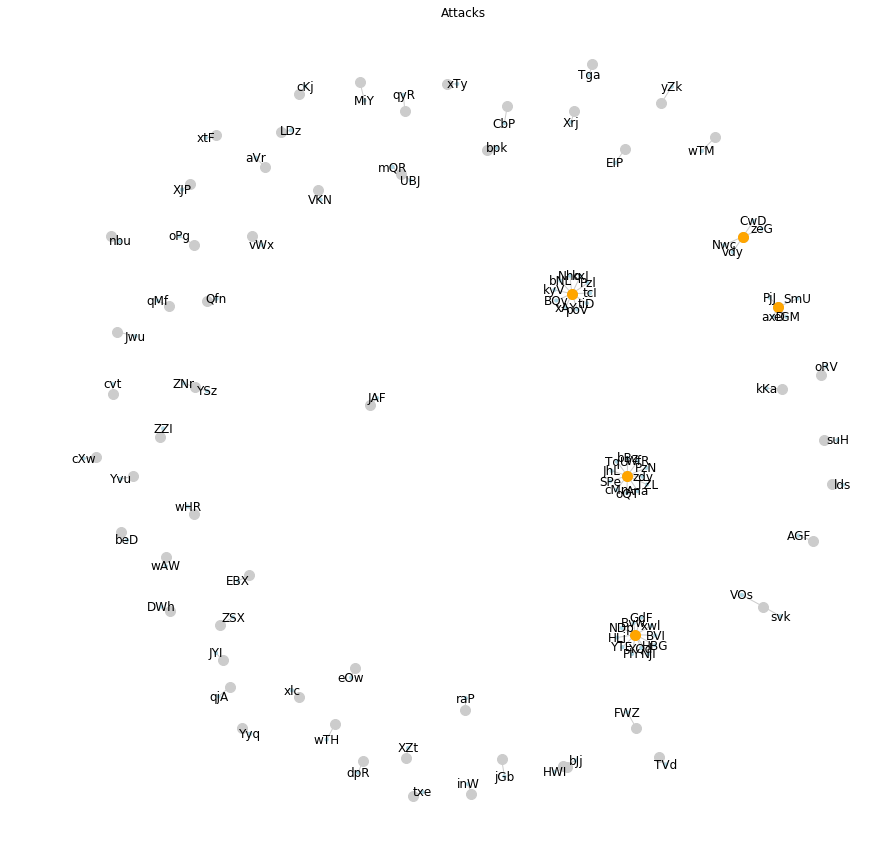

In [520]:
import matplotlib.pyplot as plt
import pylab
import graphviz

plt.figure(figsize=(15, 15))

# 1. Create the graph
g3 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='alert_ids') 

layout = nx.spring_layout(g3)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


alert_size = [g3.degree(alert) * 10 for alert in alerts]
nx.draw_networkx_nodes(g3,
                       layout, 
                       nodelist=alerts, 
                       node_size=alert_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g3, layout, nodelist=ips, node_color='#cccccc', node_size=100)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ip = [ip for ip in ips if g3.degree(ip) > 2]

nx.draw_networkx_nodes(g3, layout , nodelist=popular_ip, node_color='orange', node_size=100)

nx.draw_networkx_edges(g3, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(alerts,alerts))
nx.draw_networkx_labels(g3, layout, labels=node_labels)


# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()



In [521]:
severity=list(data_cat[0:100].overallseverity.unique())

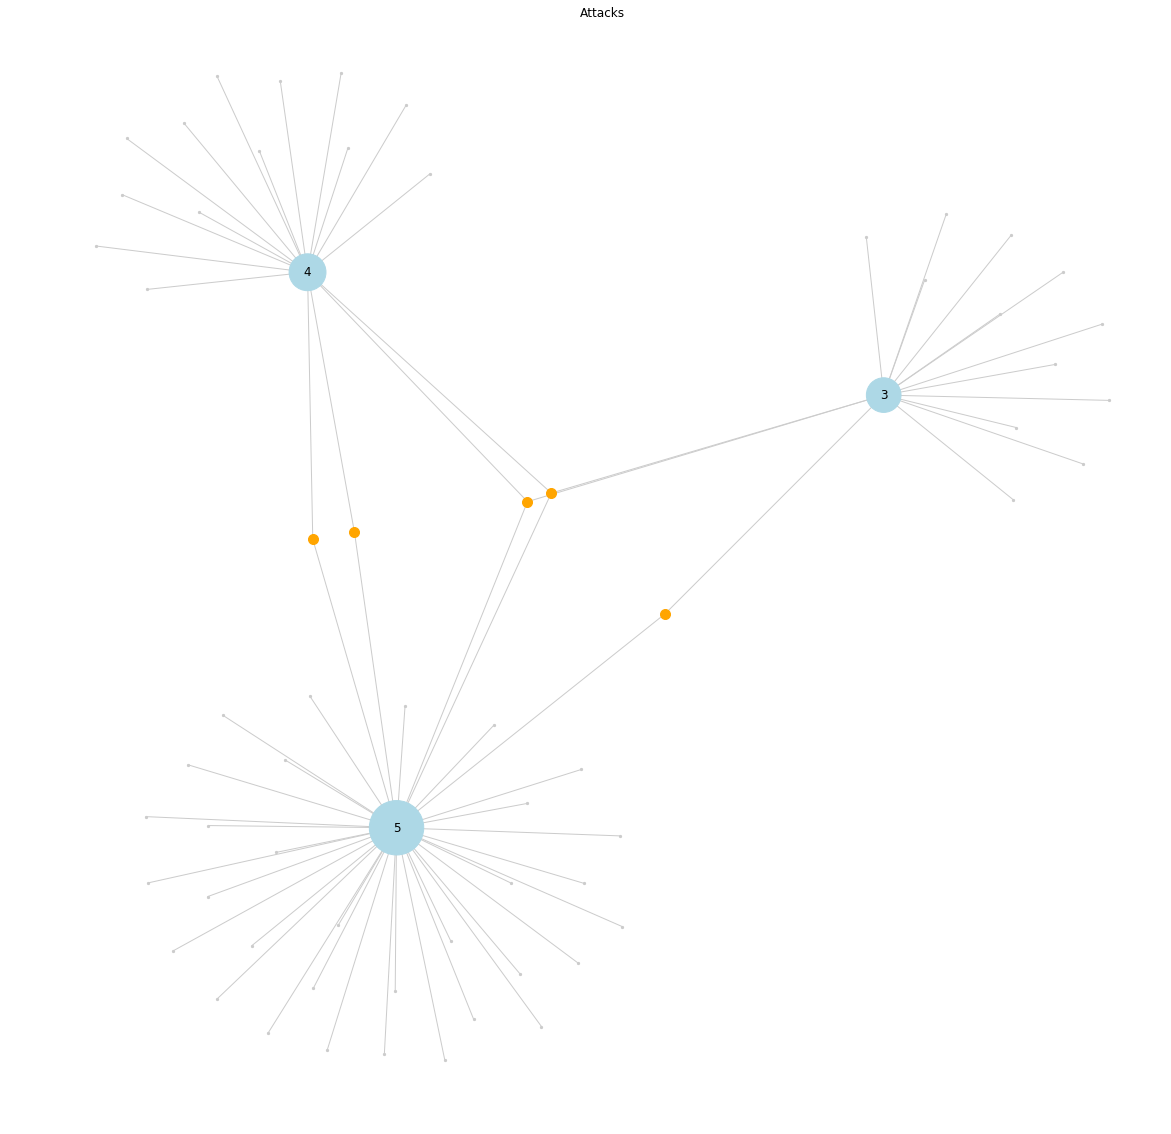

In [522]:
import matplotlib.pyplot as plt
import pylab
import graphviz

plt.figure(figsize=(20, 20))

# 1. Create the graph
g4 = nx.from_pandas_edgelist(data_cat[0:100], source='ip', target='overallseverity') 

layout = nx.spring_layout(g4)
# 3. Draw the parts we want
# Edges thin and grey
# People small and grey
# Clubs sized according to their number of connections
# Clubs blue
# Labels for clubs ONLY
# People who are highly connected are a highlighted color

# Go through every club name, ask the graph how many
# connections it has. Multiply that by 80 to get the circle size


sever_size = [g4.degree(sever) * 80 for sever in severity]
nx.draw_networkx_nodes(g4,
                       layout, 
                       nodelist=severity, 
                       node_size=sever_size, # a LIST of sizes, based on g.degree
                       node_color='lightblue')


# # Draw EVERYONE
nx.draw_networkx_nodes(g4, layout, nodelist=ips, node_color='#cccccc', node_size=5)
# nx.draw_networkx_nodes(g, layout, nodelist=alerts, node_color='#cccccc', node_size=50)

# Draw POPULAR IPS
popular_ip = [ip for ip in ips if g4.degree(ip) > 1]

nx.draw_networkx_nodes(g4, layout , nodelist=popular_ip, node_color='orange', node_size=100)

nx.draw_networkx_edges(g4, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(severity,severity))
nx.draw_networkx_labels(g4, layout, labels=node_labels)


# node_labels_ip = dict(zip(popular_ips, popular_ips))
# nx.draw_networkx_labels(g, layout, labels=node_labels_ip)

# 4. Turn off the axis because I know you don't want it
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()



In [5]:
plt.figure(figsize=(25, 25))

F= nx.compose(g,g1)

G=nx.compose(F,g2)

layout = nx.nx_agraph.graphviz_layout(G, prog='dot')
ip_size = [G.degree(name) * 1000 for name in ip_cat_name]


week_size = [G.degree(weekday) * 500 for weekday in weekdays]
nx.draw_networkx_nodes(G,
                       layout, 
                       with_labels=True, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

notify_size = [G.degree(notify) * 200 for notify in notify_cat]
nx.draw_networkx_nodes(G,
                       layout, 
                       with_labels=True, 
                       nodelist=notify_cat, 
                       node_size=notify_size, # a LIST of sizes, based on g.degree
                       node_color='lightgrey')
nx.draw_networkx_nodes(G,
                       layout, 
                       with_labels=True, 
                       nodelist=ip_cat_name, 
                       node_size=ip_size, # a LIST of sizes, based on g.degree
                       node_color='#9A76B3')
# # Draw EVERYONE
nx.draw_networkx_nodes(G, layout, nodelist=ips, node_color='#cccccc', node_size=3)


# Draw POPULAR IPS
popular_ips = [ip for ip in ips if G.degree(ip) > 3]

nx.draw_networkx_nodes(G, layout , nodelist=popular_ips, node_color='orange', node_size=10)

nx.draw_networkx_edges(G, layout, width=1, edge_color="#cccccc")

node_labels = dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(G, layout, labels=node_labels)

node_labels_week= dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(G, layout, labels=node_labels_week)
# 4. Turn off the axis because I know you don't want it
node_labels_notify= dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(G, layout, labels=node_labels_notify)
plt.axis('off')

plt.title("Attacks")

# 5. Tell matplotlib to show it
plt.show()


NameError: name 'g' is not defined

<Figure size 1800x1800 with 0 Axes>